### Vector Autoregressions tsa.vector_ar
https://www.statsmodels.org/dev/vector_ar.html#var-p-processes

In [1]:
# some example data
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
mdata = sm.datasets.macrodata.load_pandas().data

# prepare the date index
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quaterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str
quaterly = dates_from_str(quaterly)
mdata = mdata[['realgdp', 'realcons', 'realinv']]
mdata.index = pandas.DatetimeIndex(quaterly)
data = np.log(mdata).diff().dropna()

# make a VAR model
model = VAR(data)

c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'
c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:586: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None


In [4]:
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Apr, 2023
Time:                     06:42:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

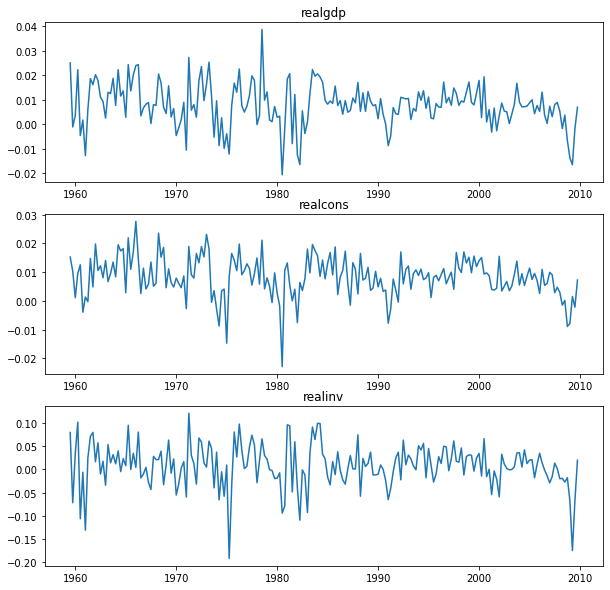

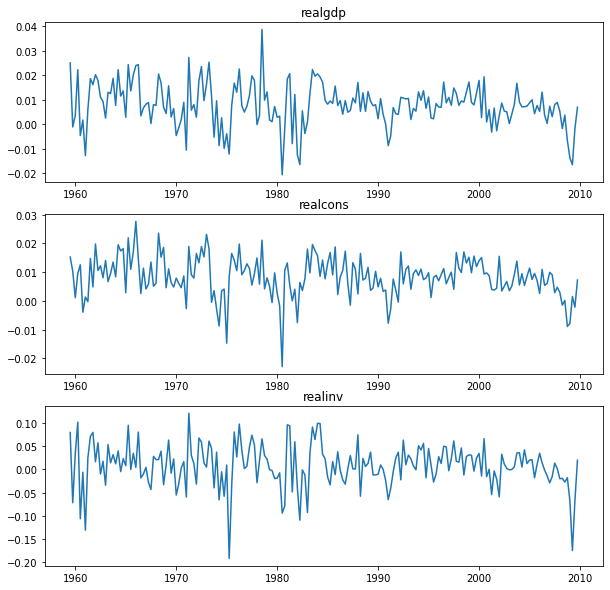

In [5]:
results.plot()

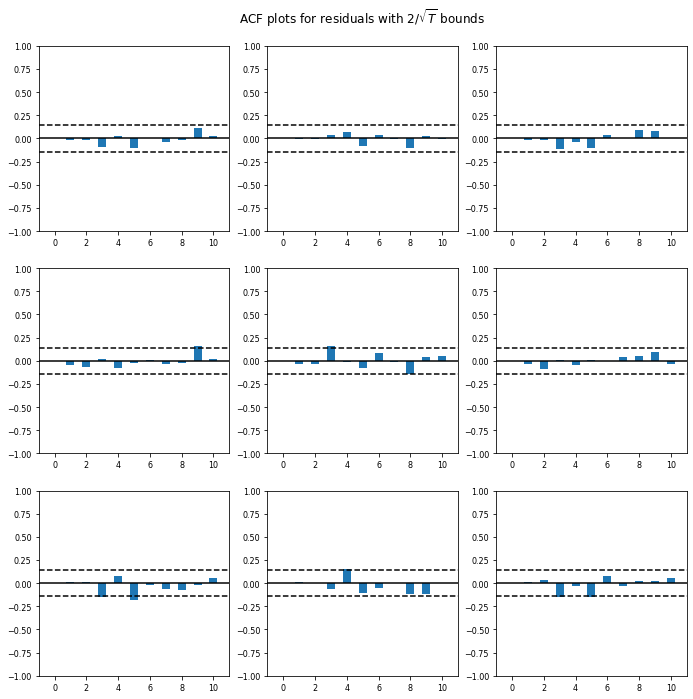

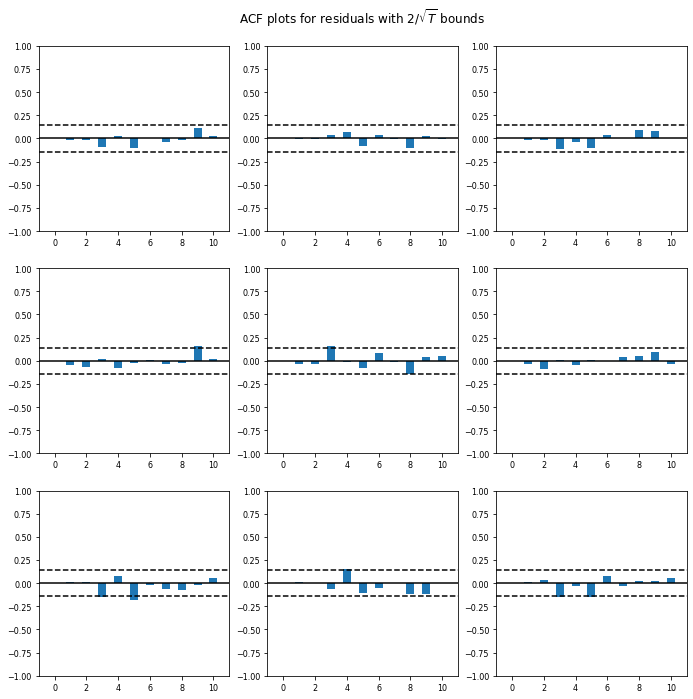

In [7]:
results.plot_acorr()

In [9]:
model.select_order(15)
results = model.fit(maxlags=15, ic='aic')

In [11]:
lag_order = results.k_ar
results.forecast(data.values[-lag_order:],5)

array([[ 0.00616044,  0.00500006,  0.00916198],
       [ 0.00427559,  0.00344836, -0.00238478],
       [ 0.00416634,  0.0070728 , -0.01193629],
       [ 0.00557873,  0.00642784,  0.00147152],
       [ 0.00626431,  0.00666715,  0.00379567]])

### Impulse Response Analysys

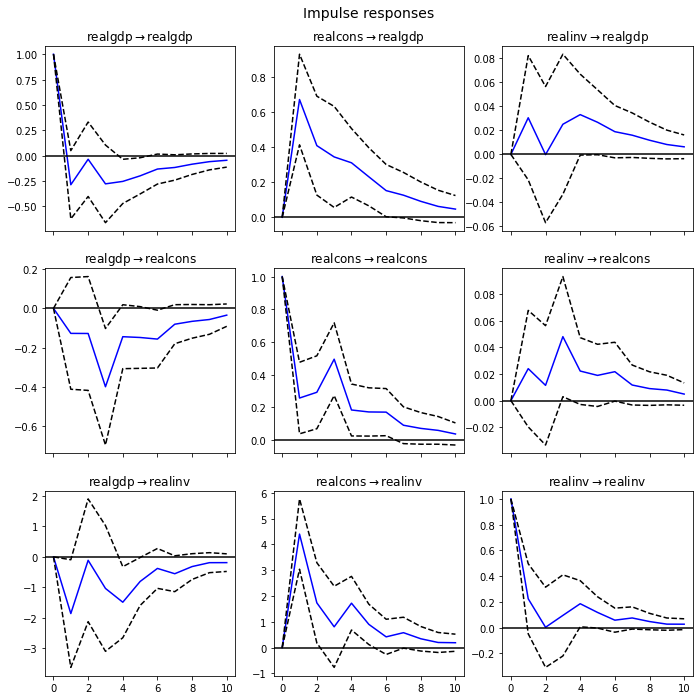

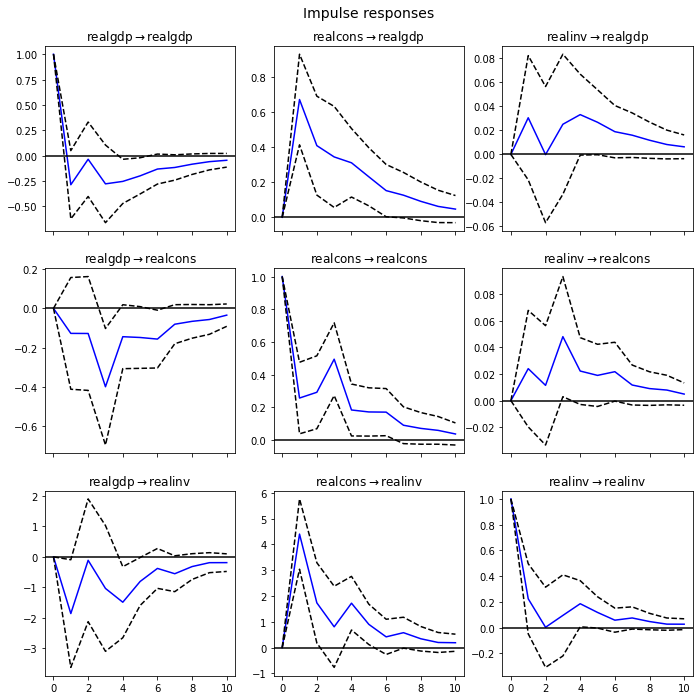

In [12]:
irf = results.irf(10)
irf.plot(orth=False)

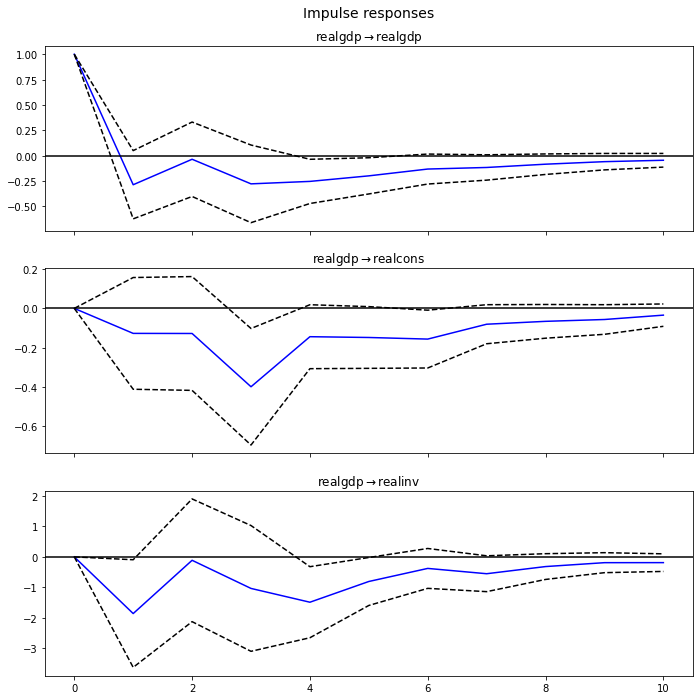

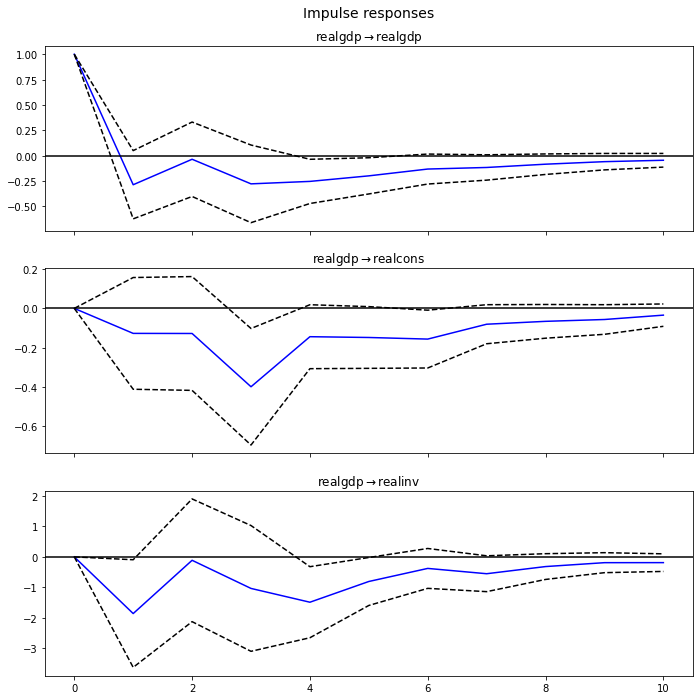

In [13]:
irf.plot(impulse='realgdp')

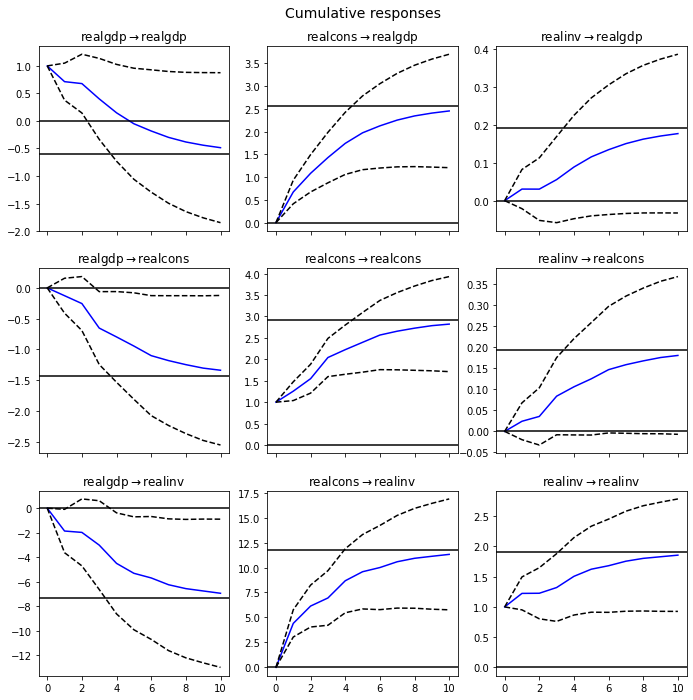

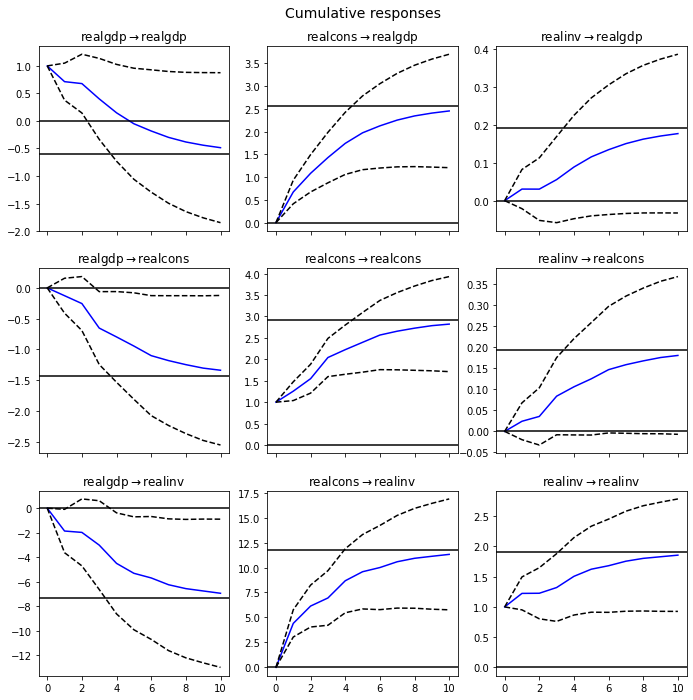

In [14]:
irf.plot_cum_effects(orth=False)

### Forecast Error Variance Decomposition(FEVD)

In [15]:
fevd = results.fevd(5)
fevd.summary()

FEVD for realgdp
      realgdp  realcons   realinv
0    1.000000  0.000000  0.000000
1    0.864889  0.129253  0.005858
2    0.816725  0.177898  0.005378
3    0.793647  0.197590  0.008763
4    0.777279  0.208127  0.014594

FEVD for realcons
      realgdp  realcons   realinv
0    0.359877  0.640123  0.000000
1    0.358767  0.635420  0.005813
2    0.348044  0.645138  0.006817
3    0.319913  0.653609  0.026478
4    0.317407  0.652180  0.030414

FEVD for realinv
      realgdp  realcons   realinv
0    0.577021  0.152783  0.270196
1    0.488158  0.293622  0.218220
2    0.478727  0.314398  0.206874
3    0.477182  0.315564  0.207254
4    0.466741  0.324135  0.209124




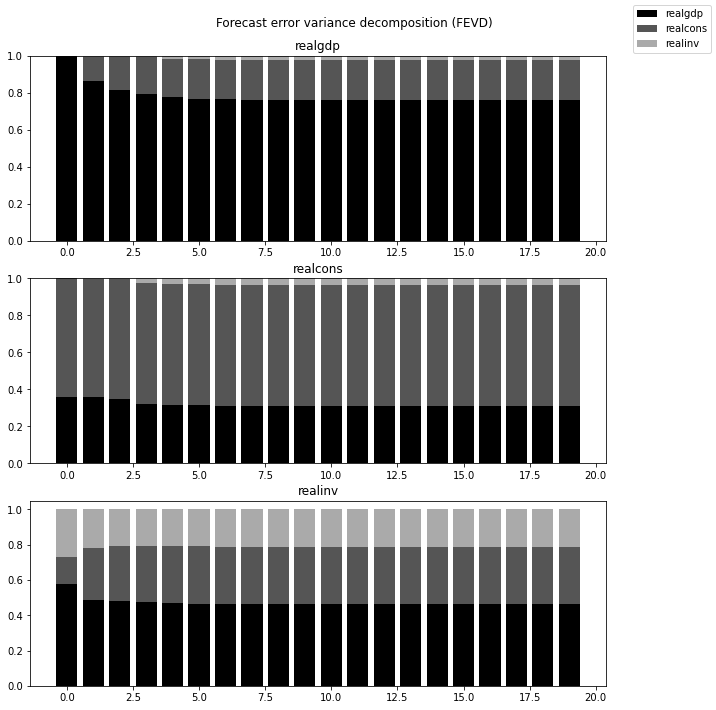

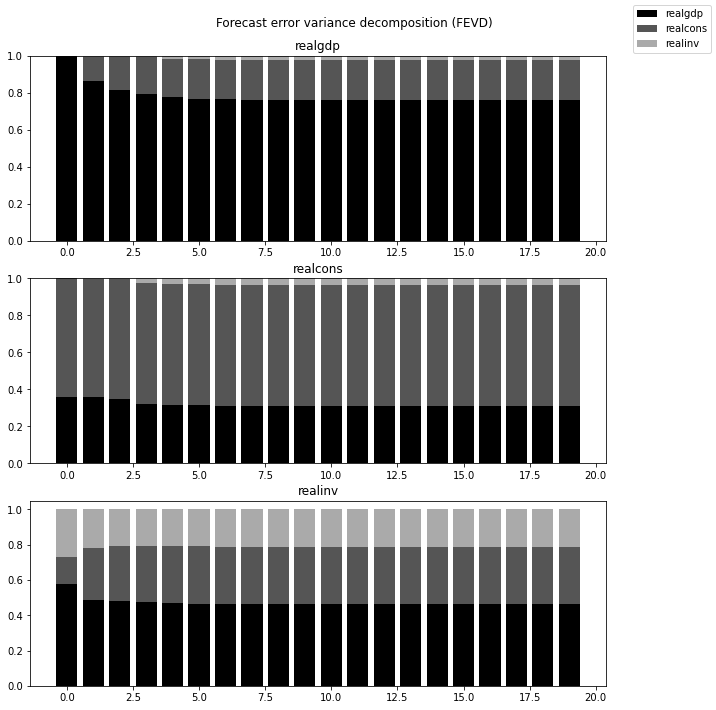

In [16]:
results.fevd(20).plot()

In [17]:
# Granger causality
results.test_causality('realgdp', ['realinv','realcons'], kind='f')
# Normality
results.test_normality()